<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/Assignment_ANN_Cancer_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading file into dataset
df=pd.read_csv("/content/survey lung cancer.csv")



In [3]:
#See the data. see the columns see the type of data in each column
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Looking at above dataseet following actions are needed.
1. Convert GENDER column in 1 and 0 using OHE
2. Normalise AGE  
3. Convert Target column-LUNG_CANCER into 1 and 0 using Label encoder


In [4]:
#Find number of rows and columns
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.isnull().sum()

#No blank value for any column. No mssing data

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## APPLY LABEL ENCODER FOR OUTPUT COLUMN


In [7]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder=preprocessing.LabelEncoder()

df['LUNG_CANCER']=label_encoder.fit_transform(df['LUNG_CANCER'])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### APPLY OHE for GENDER Columns

In [8]:
df= pd.get_dummies(df, columns = ['GENDER'])
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [ ]:
df1=df.copy()

### APPLY NORMALISATION TO AGE COLUMN

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['AGE']]=scaler.fit_transform(df[['AGE']])


df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,0.771850,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,1.381829,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,-0.448107,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,0.039876,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,0.039876,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


### Before Splitting let see if we have balance data. equal or nearly eaqual Yes/NO  OR 0/1 in Target column  "LUNG CANCER"

In [10]:
df["LUNG_CANCER"].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

### SO diff between 1 and 0s is high. Lets upsample 0s using SMOTE


In [11]:
df.shape

(309, 17)

In [ ]:
df.columns

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'GENDER_F',
       'GENDER_M'],
      dtype='object')

In [12]:
from imblearn.over_sampling import SMOTE


##p,q=SMOTE().fit_resample(df[['f1','f2']],df['target'])

p,q=SMOTE().fit_resample(df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','GENDER_F',
       'GENDER_M']],df['LUNG_CANCER'])

p.shape,q.shape,q.value_counts()

## see 0s are upsample to 270 . Accordingly input features are generated for these additional rows.


((540, 16),
 (540,),
 1    270
 0    270
 Name: LUNG_CANCER, dtype: int64)

In [15]:
type(p),type(q)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [16]:
# Lets convert these p and q back to one dataFrame

df_p=pd.DataFrame(p,columns=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','GENDER_F',
       'GENDER_M'])
df_q=pd.DataFrame(q,columns=['LUNG_CANCER'])

bal_df=pd.concat([df_p,df_q],axis=1)
bal_df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M,LUNG_CANCER
0,0.771850,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1,1
1,1.381829,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1,1
2,-0.448107,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0,0
3,0.039876,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1,0
4,0.039876,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0,0


In [17]:
bal_df['LUNG_CANCER'].value_counts()

1    270
0    270
Name: LUNG_CANCER, dtype: int64

### NOW we have dataset with balance 1s and 0s.
### Lets split it to Train test.

In [18]:
x=bal_df.iloc[:,:-1]
y=bal_df.iloc[:,-1:]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((432, 16), (108, 16), (432, 1), (108, 1))

##ANN

In [20]:
from keras.models import Sequential
from keras.layers import Dense


In [21]:
# create model
# total columns in dataset are 16 hence input_dim =16  and Hence intial layer should be 16  or more
model = Sequential()
model.add(Dense(16, input_dim=16,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer

In [22]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the model
history = model.fit(xtrain,ytrain, validation_split=0.2, epochs=100, batch_size=20)




Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 0.6949 - accuracy: 0.4870 - val_loss: 0.6743 - val_accuracy: 0.5632
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.5739 - val_loss: 0.6654 - val_accuracy: 0.6782
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6700 - accuracy: 0.6319 - val_loss: 0.6568 - val_accuracy: 0.7586
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6573 - accuracy: 0.6377 - val_loss: 0.6479 - val_accuracy: 0.6782
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6476 - accuracy: 0.6348 - val_loss: 0.6416 - val_accuracy: 0.6897
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.6493 - val_loss: 0.6326 - val_accuracy: 0.7126
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6275 - accuracy: 0.6580 - val_loss: 0.6238 - val_accuracy: 0.7126
Epoch 8/100


In [24]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

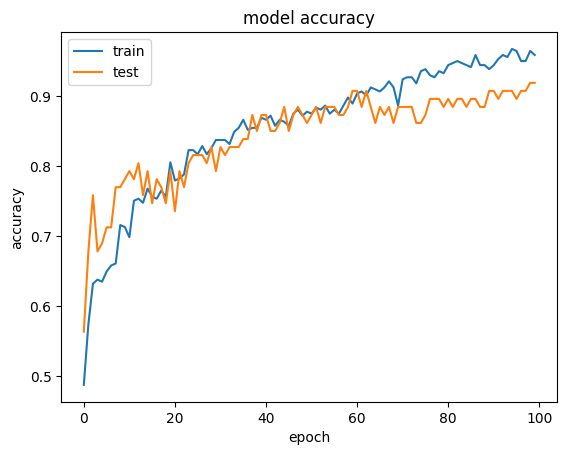

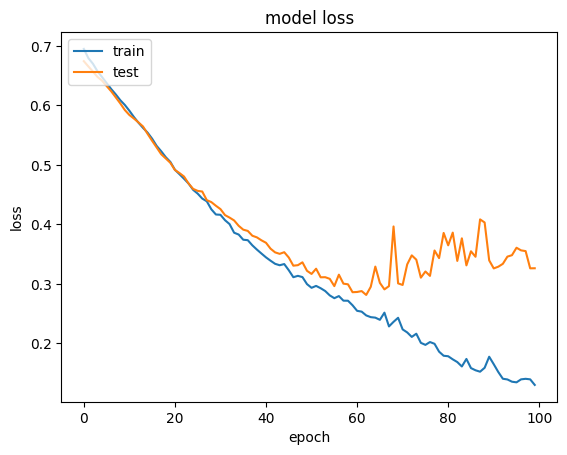

In [25]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# evaluate the model
scores = model.evaluate(xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.1606 - accuracy: 0.9352
accuracy: 93.52%


## Further Create Streamlit App that will take all 16 input parameter and and provide output on screen